Number of unique playlists: 1151
Number of unique creators: 106
       original_track_count
count           1151.000000
mean              66.051260
std               99.479716
min                6.000000
25%               21.500000
50%               40.000000
75%               75.000000
max             1774.000000


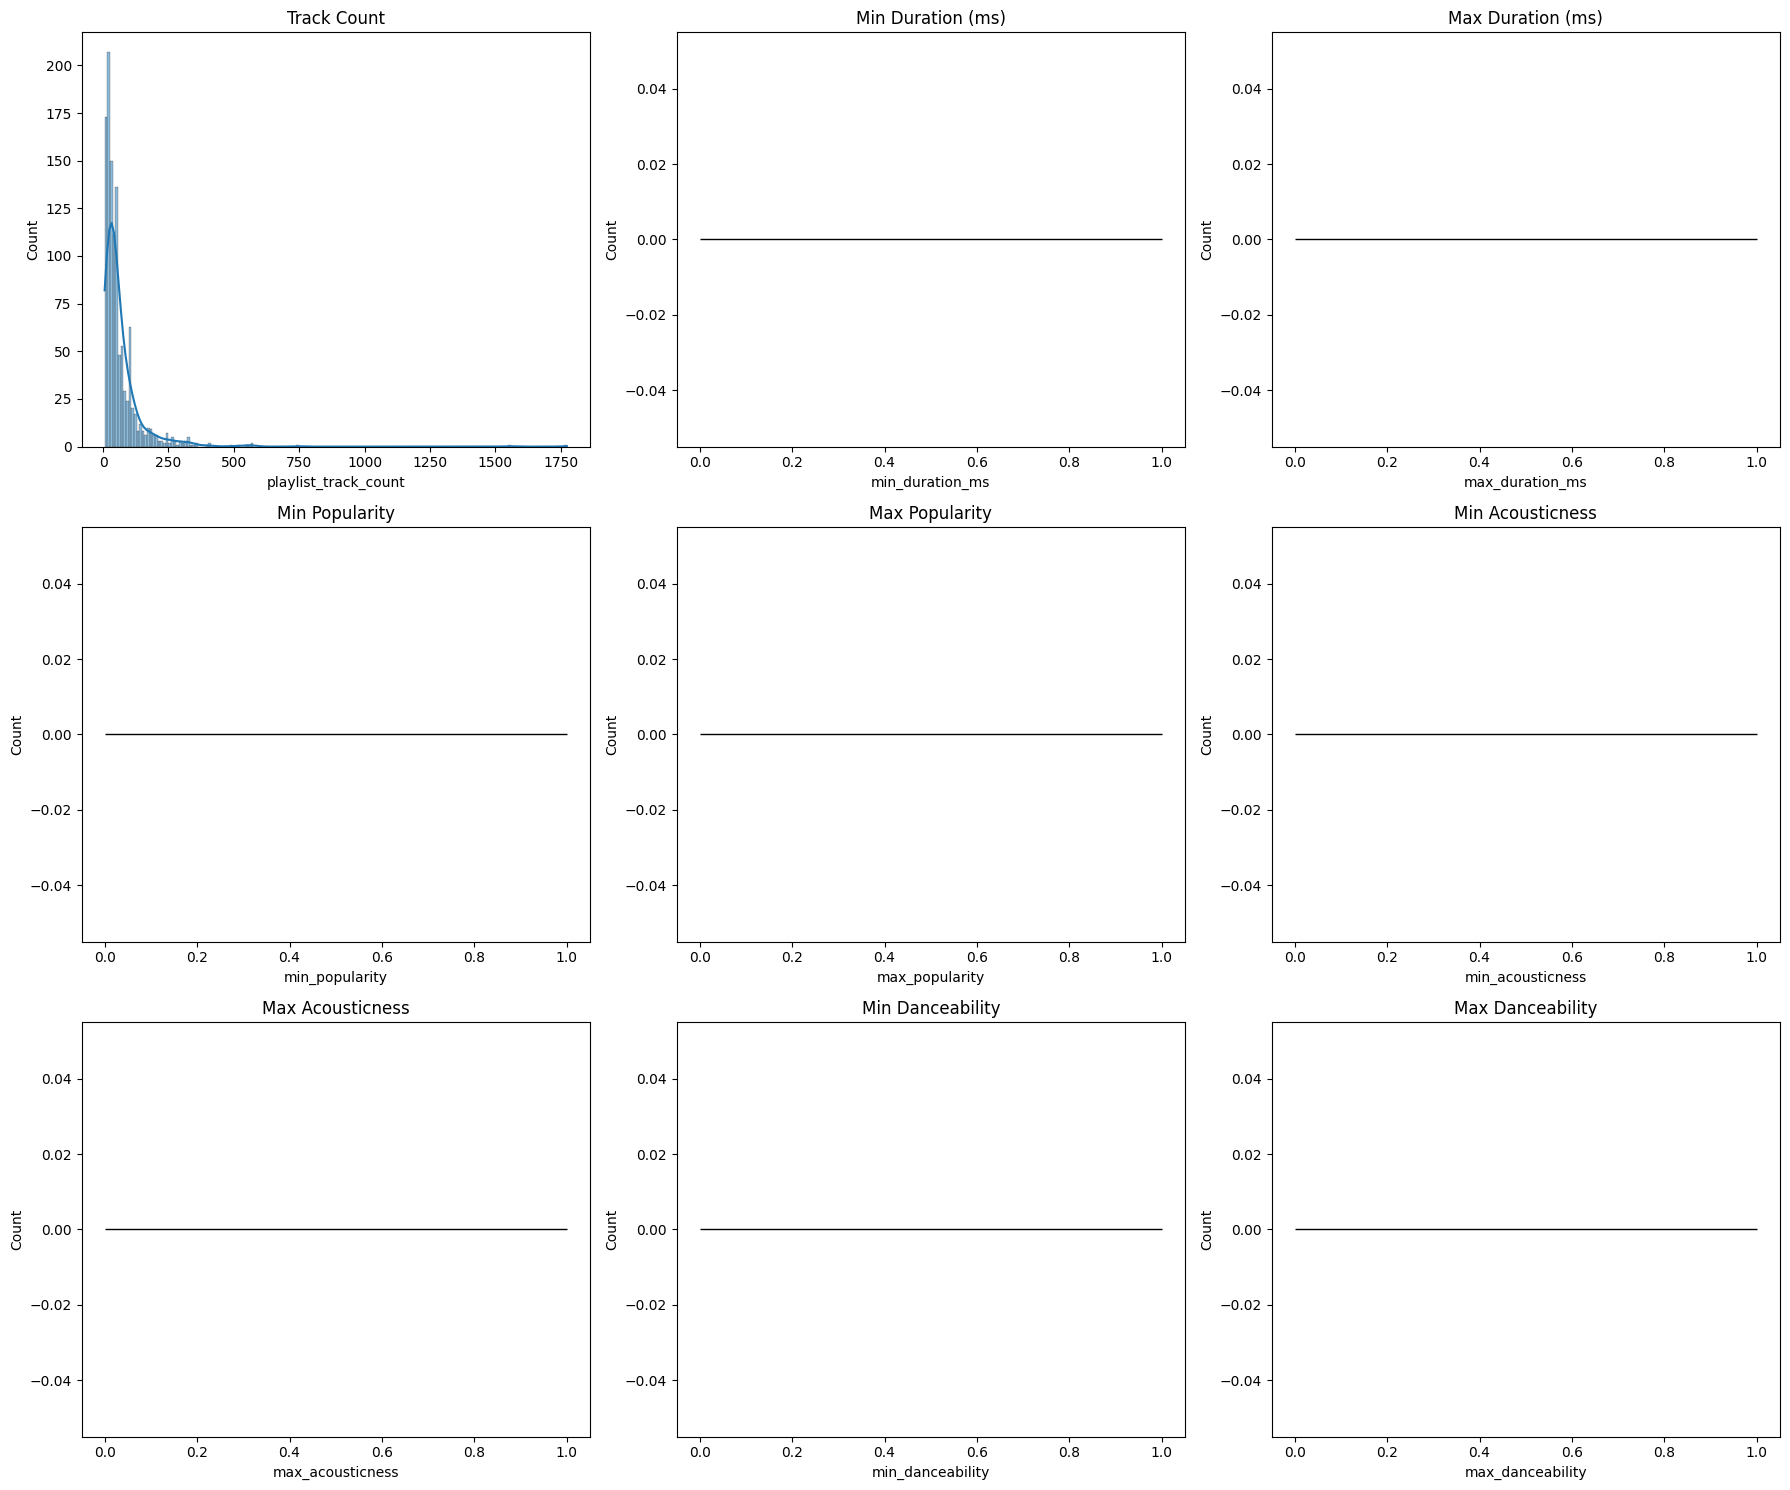

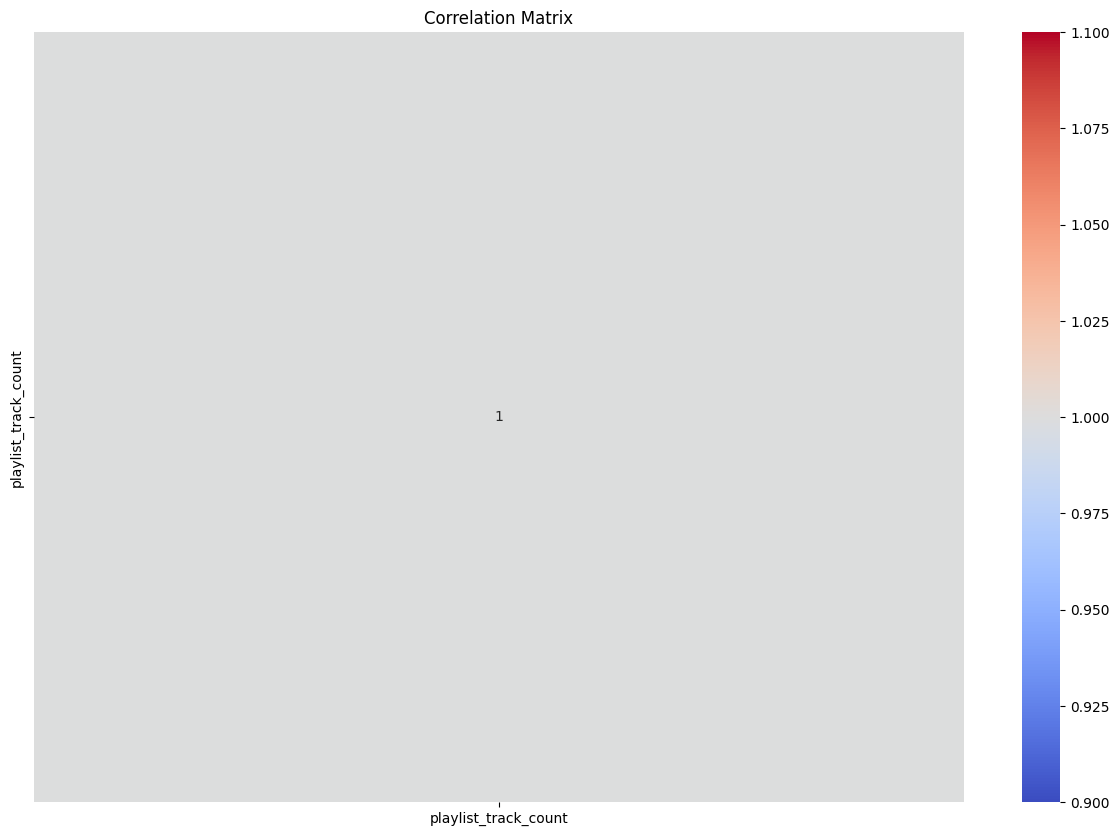

IndexError: index 0 is out of bounds for axis 0 with size 0

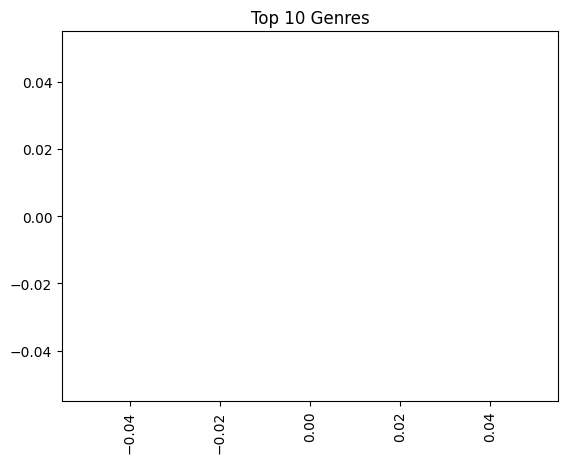

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('C:/Users/Adeteyah/Documents/music_recommender_system/data/db/playlists_details.db')

# Load data into pandas DataFrames
playlists_df = pd.read_sql_query("SELECT * FROM playlists", conn)
items_df = pd.read_sql_query("SELECT * FROM items", conn)

# Data Summary
print(f"Number of unique playlists: {playlists_df['playlist_id'].nunique()}")
print(f"Number of unique creators: {playlists_df['creator_id'].nunique()}")

# Summary statistics for playlists
print(playlists_df.describe())

# Distribution Analysis
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
sns.histplot(playlists_df['original_track_count'], kde=True, ax=axs[0, 0]).set(title='Track Count')
sns.histplot(playlists_df['min_duration_ms'], kde=True, ax=axs[0, 1]).set(title='Min Duration (ms)')
sns.histplot(playlists_df['max_duration_ms'], kde=True, ax=axs[0, 2]).set(title='Max Duration (ms)')
sns.histplot(playlists_df['min_popularity'], kde=True, ax=axs[1, 0]).set(title='Min Popularity')
sns.histplot(playlists_df['max_popularity'], kde=True, ax=axs[1, 1]).set(title='Max Popularity')
sns.histplot(playlists_df['min_acousticness'], kde=True, ax=axs[1, 2]).set(title='Min Acousticness')
sns.histplot(playlists_df['max_acousticness'], kde=True, ax=axs[2, 0]).set(title='Max Acousticness')
sns.histplot(playlists_df['min_danceability'], kde=True, ax=axs[2, 1]).set(title='Min Danceability')
sns.histplot(playlists_df['max_danceability'], kde=True, ax=axs[2, 2]).set(title='Max Danceability')
plt.tight_layout()
plt.show()

# Select only numeric columns for correlation matrix
numeric_cols = playlists_df.select_dtypes(include=['number']).columns
corr_matrix = playlists_df[numeric_cols].corr()

# Correlation Matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Genre Analysis
# Assuming genres are stored as comma-separated values
playlists_df['most_genres'] = playlists_df['most_genres'].str.split(',')
genres_exploded = playlists_df.explode('most_genres')
top_genres = genres_exploded['most_genres'].value_counts().head(10)
top_genres.plot(kind='bar', title='Top 10 Genres')
plt.show()

# Close the database connection
conn.close()
